In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
from matplotlib import cm # for colormaps
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D



from HANCModel import HANCModelClass

In [17]:
x_vec = np.linspace(0.01,2,100)

def margtax(x,emax,x0,xh):
    return emax*0.5**((xh-x0)/(x-x0))*(1-np.log(0.5)*(xh-x0)*x/((x-x0)**2))

def taxrate(x,emax,x0,xh):
    return emax*0.5**((xh-x0)/(x-x0))

def tax(x,emax,x0,xh):
    return emax*0.5**((xh-x0)/(x-x0))*x


def margtax(x,emax,x0,xh):
    return x**(emax)/xh**(emax)

def tax(x,emax,x0,xh):
    return x**(emax+1)/(xh**emax* (emax+1))

def taxrate(x,emax,x0,xh):
    return tax(x,emax,x0,xh)/x


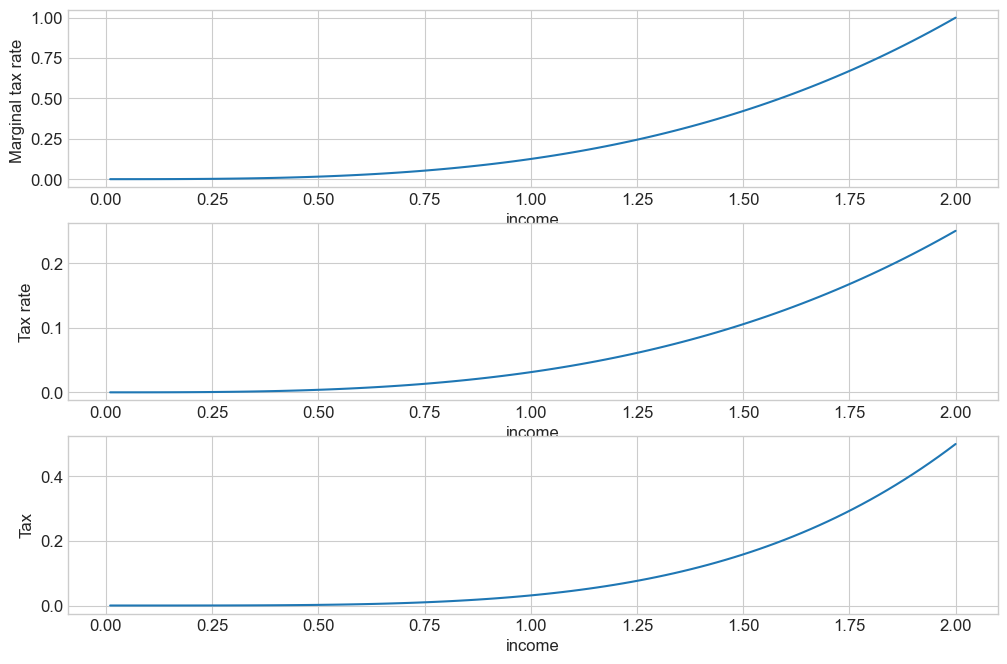

In [20]:
fig = plt.figure(figsize=(12,8),dpi=100)
ax = fig.add_subplot(3,1,1)

emax = 3
x0 = 0
xh = 2


ax.plot(x_vec,margtax(x_vec,emax,x0,xh))
ax.set_ylabel('Marginal tax rate ')
ax.set_xlabel(f'income');


ax = fig.add_subplot(3,1,2)
ax.plot(x_vec,taxrate(x_vec,emax,x0,xh))
ax.set_ylabel('Tax rate')
ax.set_xlabel(f'income');



ax = fig.add_subplot(3,1,3)
ax.plot(x_vec,tax(x_vec,emax,x0,xh))
ax.set_ylabel('Tax')
ax.set_xlabel(f'income');



In [42]:
tax(50,emax,x0,xh)

25.0

In [103]:

def posttax(x,xh,theta,taul):
    return x**theta/(xh**theta) * xh*taul

def margtax(x,xh,theta,taul):
    return x**(emax)/xh**(emax)

def tax(x,xh,theta,taul):
    return x-posttax(x,xh,theta,taul)

def taxrate(x,xh,theta,taul):
    return tax(x,xh,theta,taul)/x


In [104]:
tax(0.01,2,0.5,0.5)

-0.06071067811865475

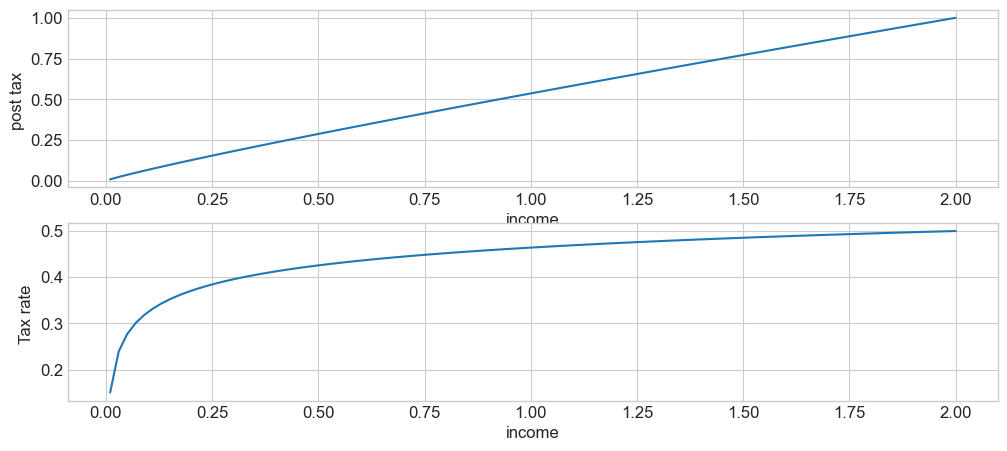

In [111]:
fig = plt.figure(figsize=(12,8),dpi=100)
ax = fig.add_subplot(3,1,1)
xh = 2
x_vec = np.linspace(0.01,xh,100)
emax = 3
x0 = 0
taul = 0.5

theta = 0.9

ax.plot(x_vec,posttax(x_vec,xh,theta,taul))
ax.set_ylabel('post tax ')
ax.set_xlabel(f'income');


ax = fig.add_subplot(3,1,2)
ax.plot(x_vec,taxrate(x_vec,xh,theta,taul))
ax.set_ylabel('Tax rate ')
ax.set_xlabel(f'income');